### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import os

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pe-files-malwares/dataset_test.csv
/kaggle/input/pe-files-malwares/dataset_malwares.csv


In [2]:
data = pd.read_csv('/kaggle/input/pe-files-malwares/dataset_malwares.csv')

In [3]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [5]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

### Classes Distribution

[Text(0, 0, 'Benign'), Text(0, 0, 'Malware')]

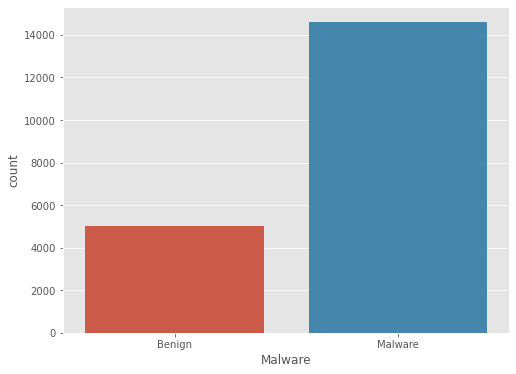

In [6]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])

### Features visualization

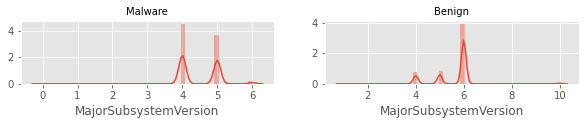

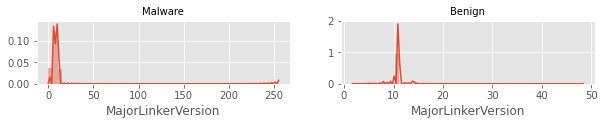

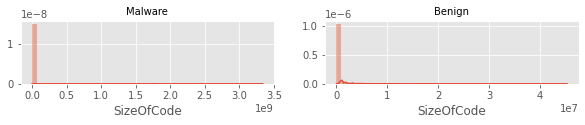

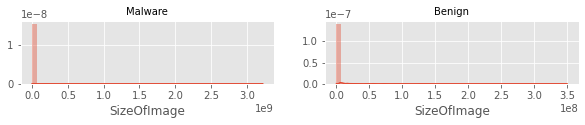

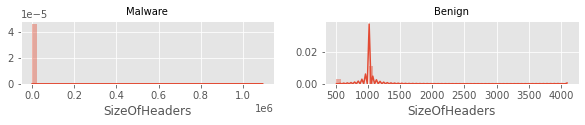

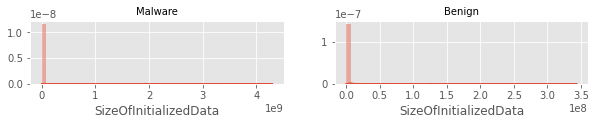

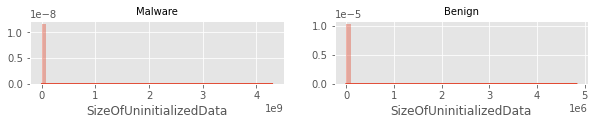

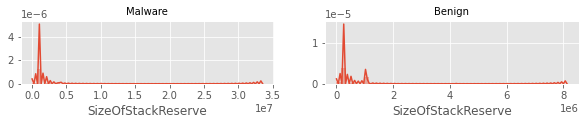

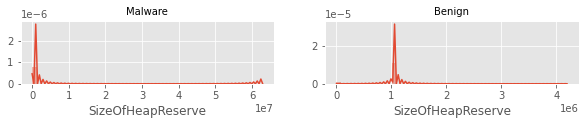

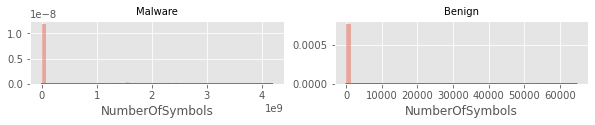

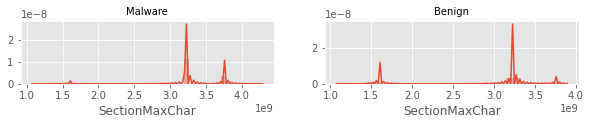

In [7]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
           'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
            'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2
    

### Splitting the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=42)

### Standarisasi fitur

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the model

In [10]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

### Laporan klasifikasi

In [11]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.99      0.45       995
           1       0.99      0.16      0.28      2928

    accuracy                           0.37      3923
   macro avg       0.64      0.58      0.36      3923
weighted avg       0.81      0.37      0.32      3923



#### Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

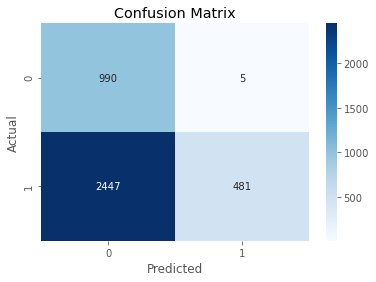

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

#### Saving model

In [13]:
with open('nb_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

#### Mean & Var Fitur

In [14]:
features_mean = pd.DataFrame(nb_model.theta_, columns=used_data.columns)
features_var = pd.DataFrame(nb_model.sigma_, columns=used_data.columns)

print("Mean of features for each class:")
print(features_mean)

print("Variance of features for each class:")
print(features_var)

Mean of features for each class:
   e_magic    e_cblp      e_cp    e_crlc  e_cparhdr  e_minalloc  e_maxalloc  \
0      0.0 -0.041272 -0.045928 -0.040009  -0.038304   -0.039106   -0.324852   
1      0.0  0.014205  0.015808  0.013771   0.013184    0.013460    0.111810   

       e_ss      e_sp    e_csum  ...  SectionMaxChar  SectionMainChar  \
0 -0.015756 -0.042854 -0.029213  ...       -0.669698              0.0   
1  0.005423  0.014750  0.010055  ...        0.230501              0.0   

   DirectoryEntryImport  DirectoryEntryImportSize  DirectoryEntryExport  \
0              0.257644                 -0.033938              0.169933   
1             -0.088677                  0.011681             -0.058489   

   ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0                  -0.004644                  -0.021605   
1                   0.001598                   0.007436   

   ImageDirectoryEntryResource  ImageDirectoryEntryException  \
0                    -0.027080           

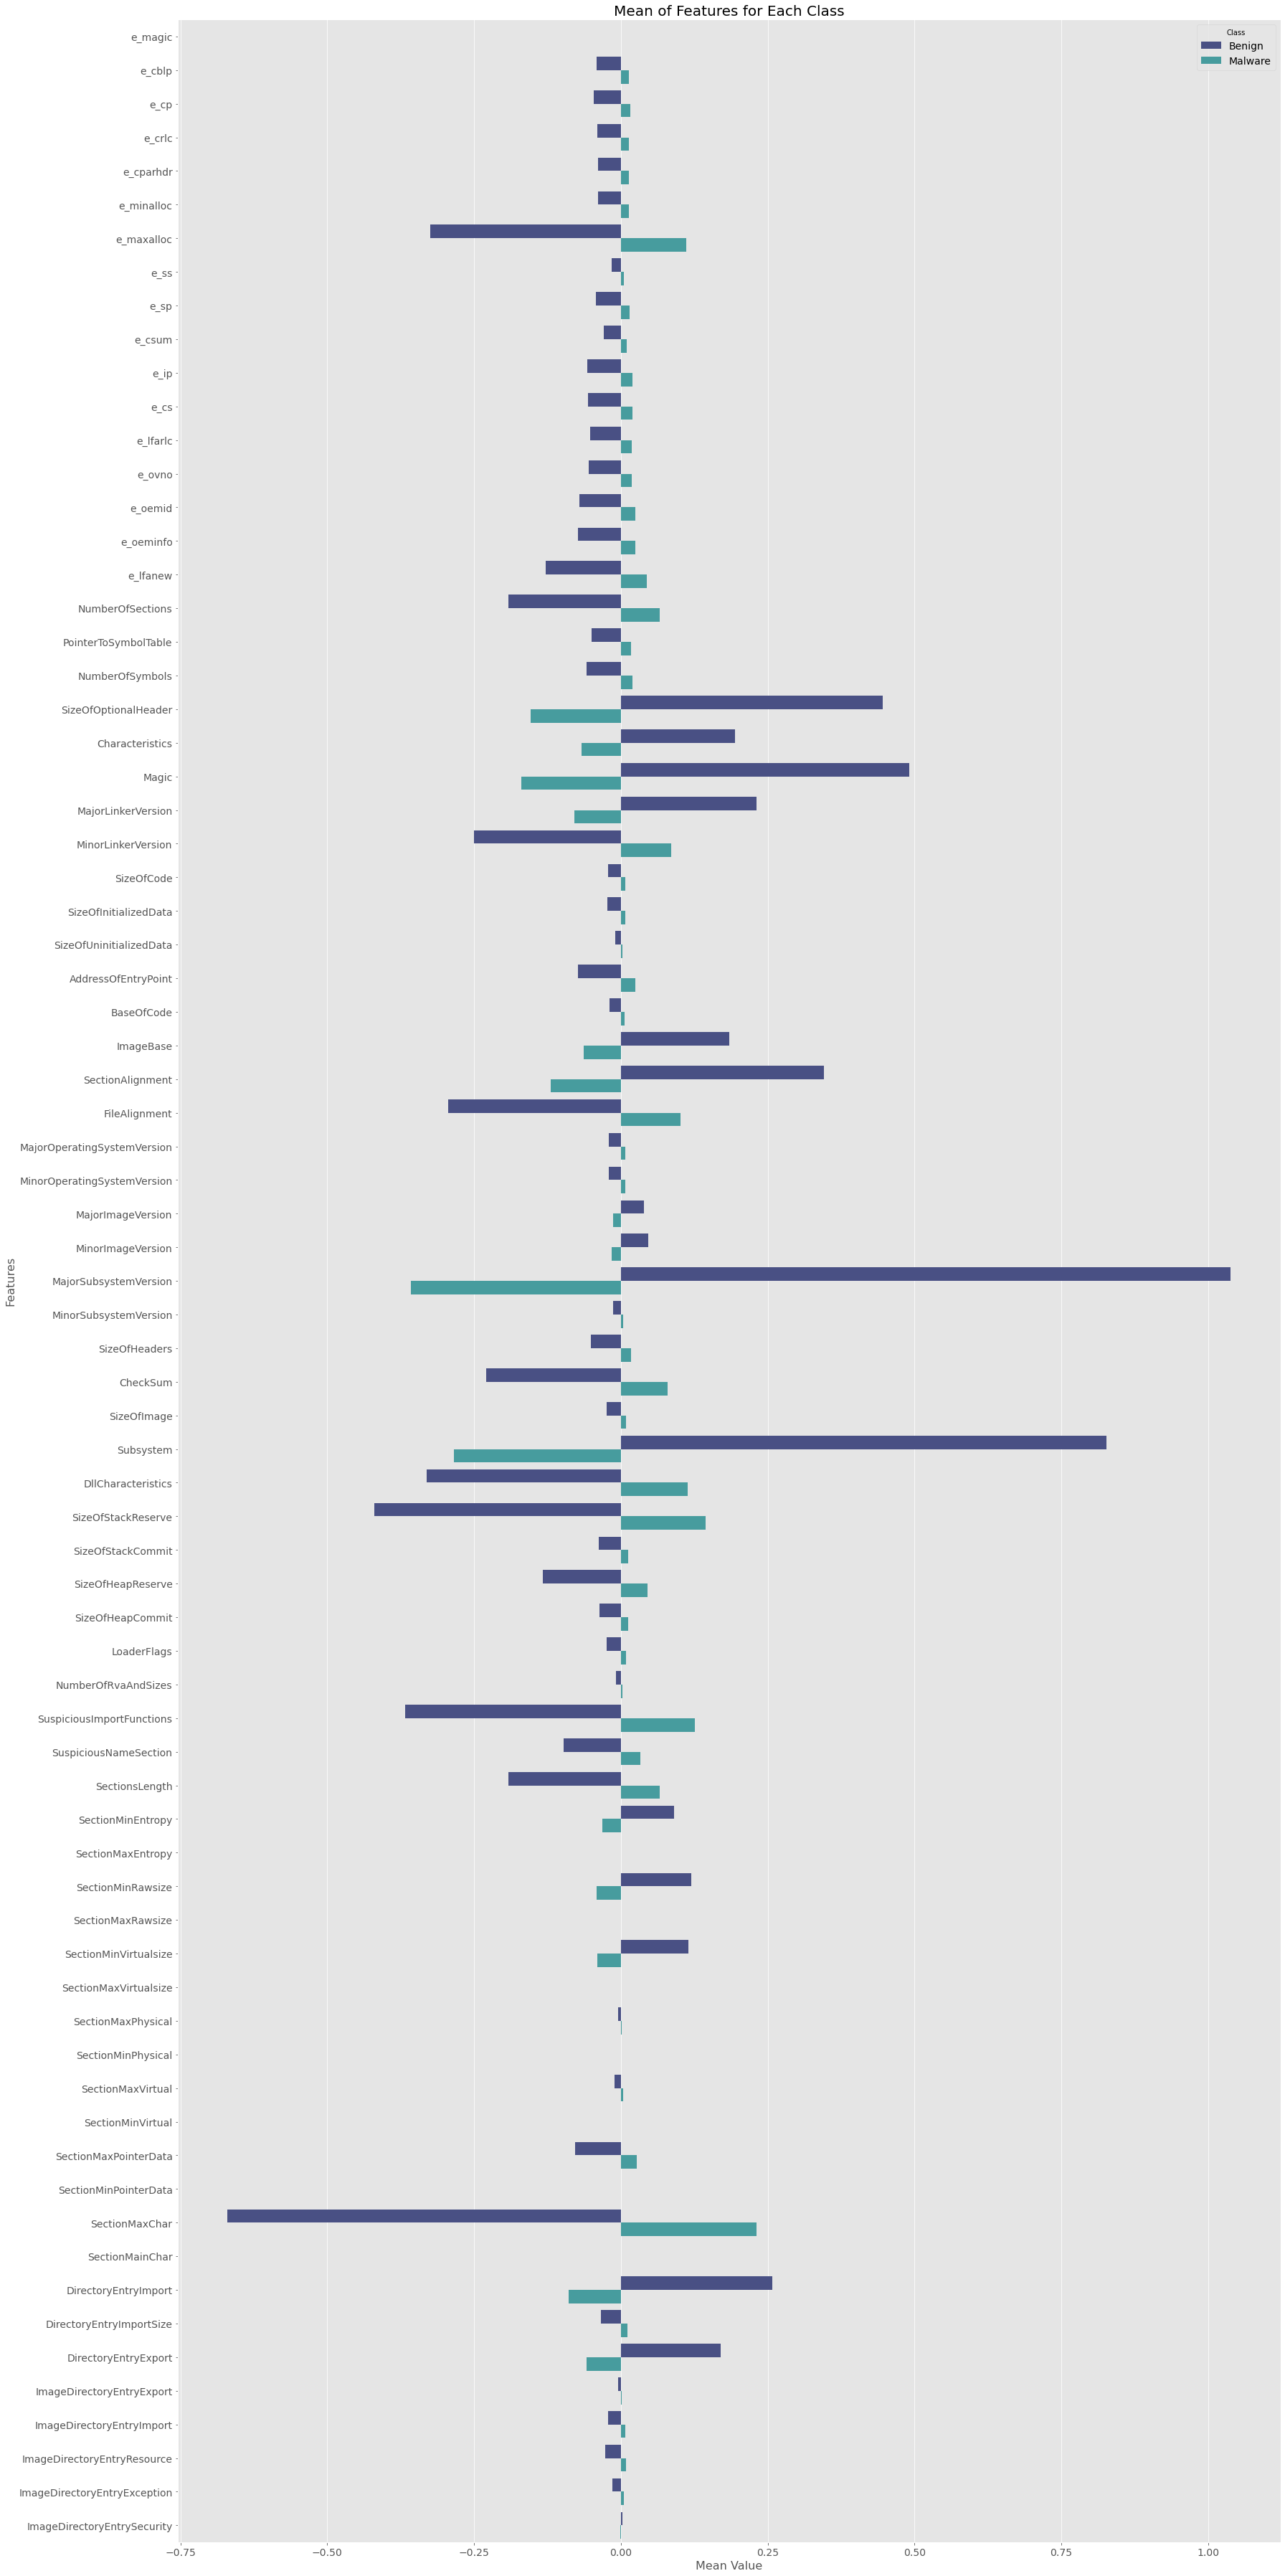

In [15]:
# Membuat DataFrame untuk mean dari fitur untuk setiap kelas
mean_df = pd.DataFrame({
    'Feature': used_data.columns,
    'Benign': features_mean.iloc[0, :].values,
    'Malware': features_mean.iloc[1, :].values
})

# Menggunakan seaborn untuk visualisasi yang lebih baik
mean_melted = mean_df.melt(id_vars='Feature', var_name='Class', value_name='Mean')

# Ukuran plot yang lebih besar
plt.figure(figsize=(25,50))

# Membuat bar plot dengan seaborn
sns.barplot(x='Mean', y='Feature', hue='Class', data=mean_melted, palette='mako')

# Mengatur judul dan label
plt.title('Mean of Features for Each Class', fontsize=20)
plt.xlabel('Mean Value', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Class', fontsize=14)
plt.tight_layout()

# Menampilkan plot
plt.show()

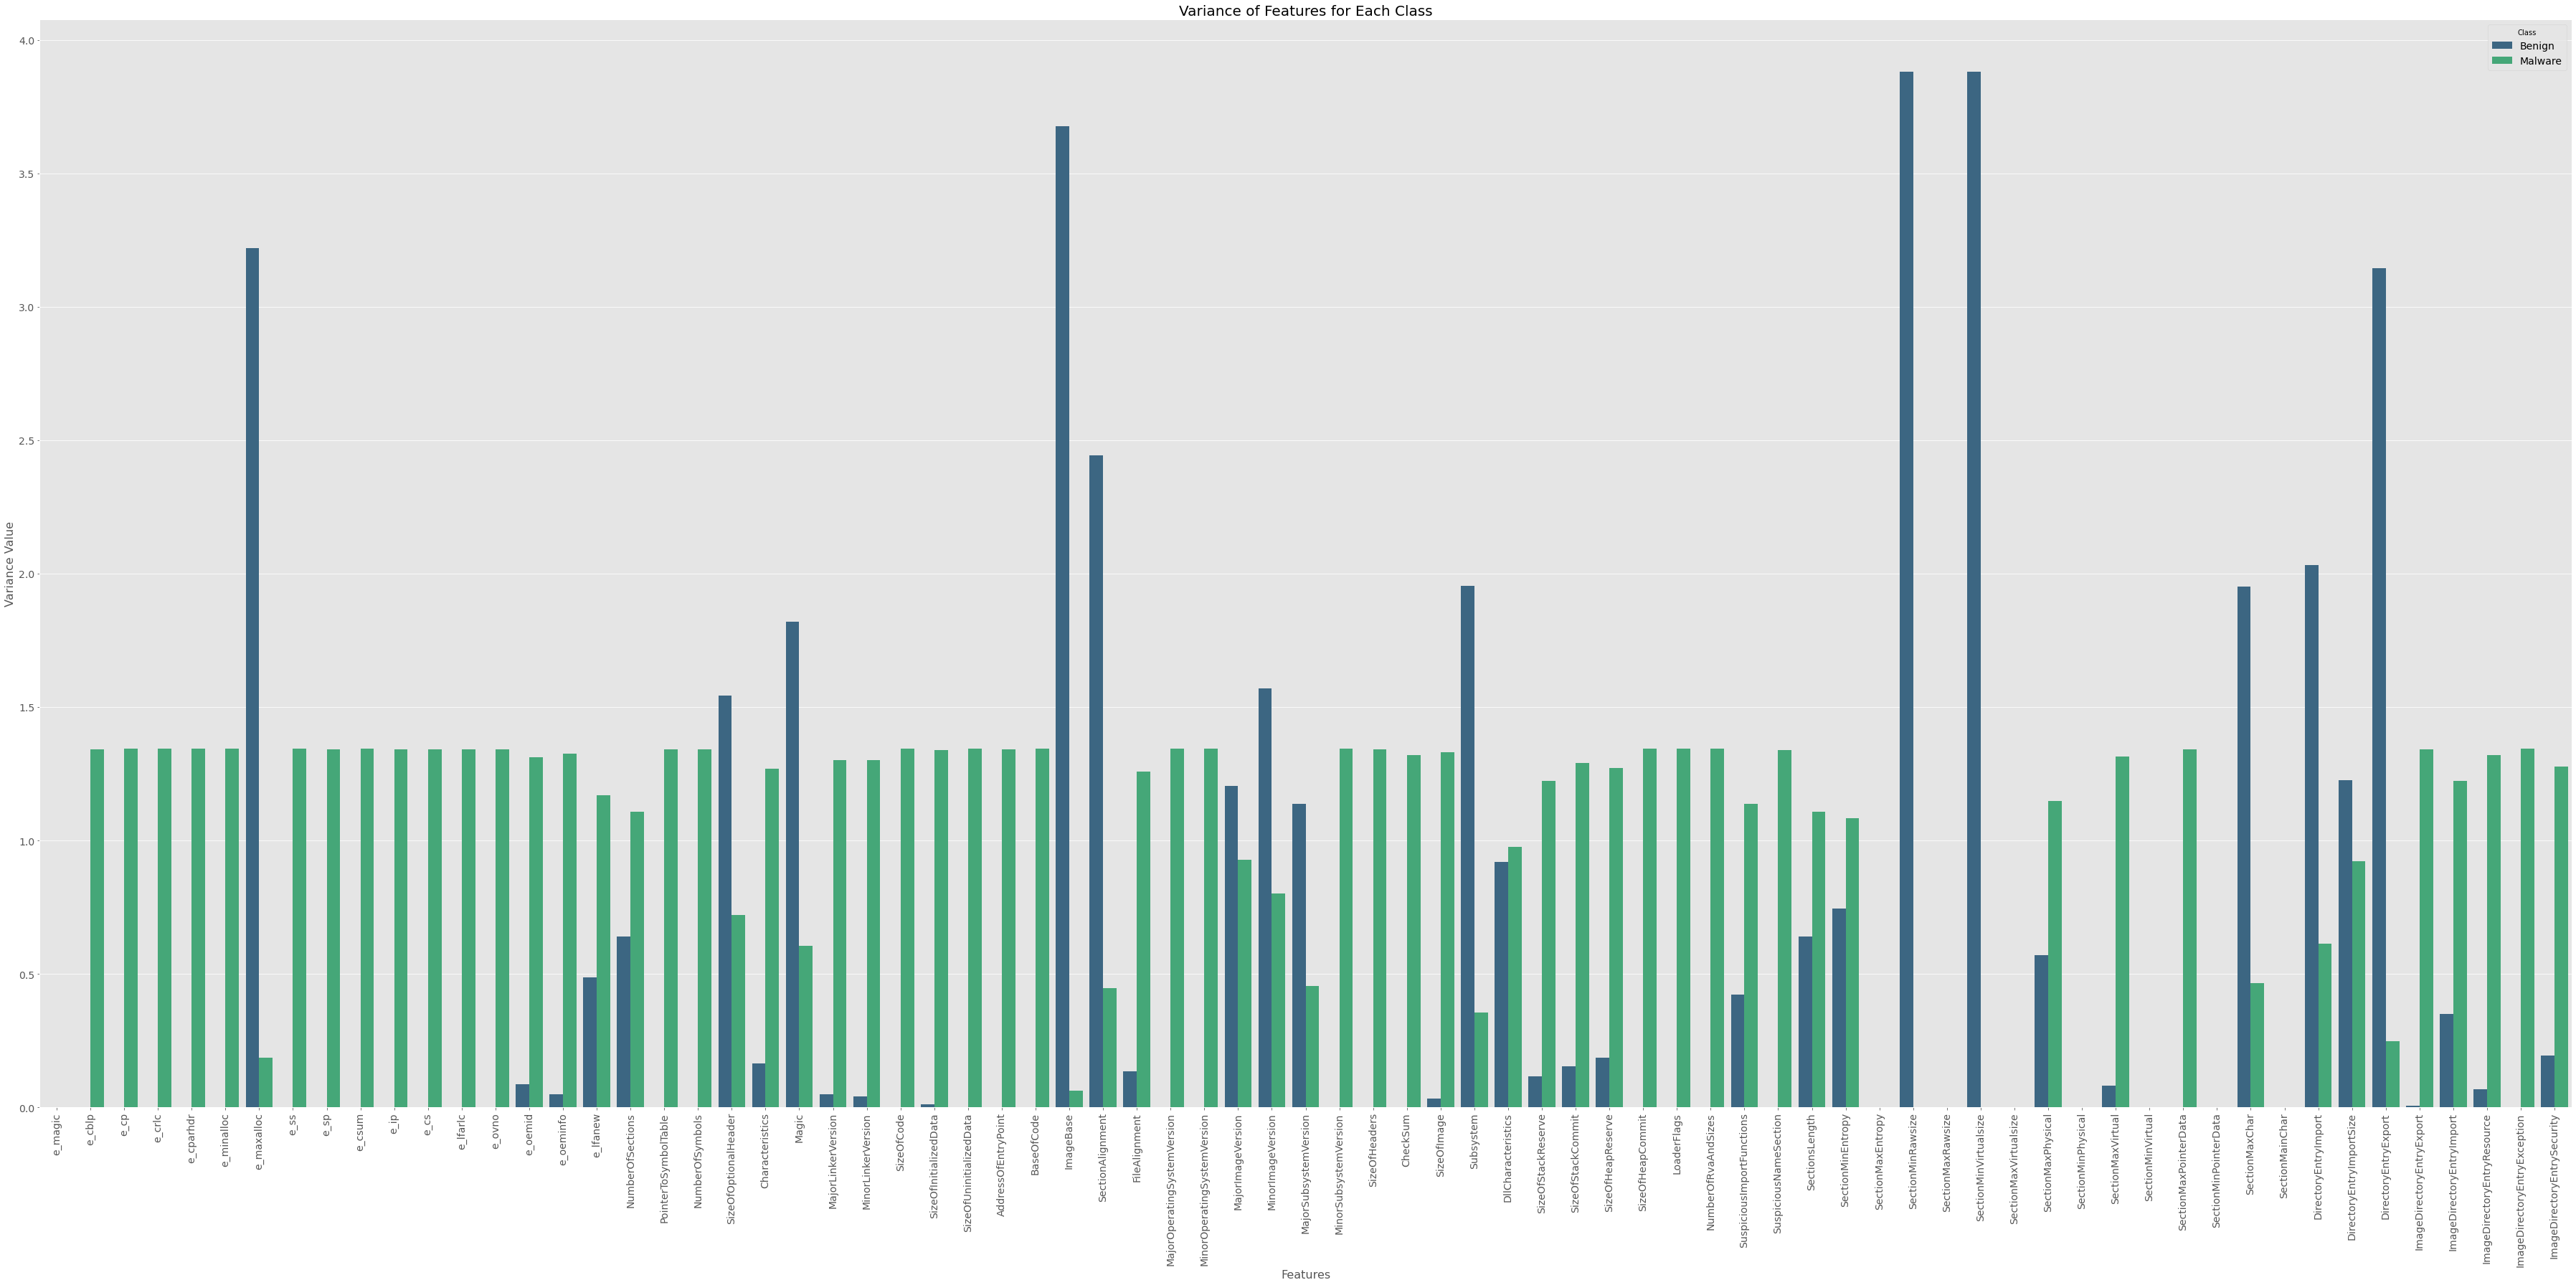

In [16]:
# Membuat DataFrame untuk varians dari fitur untuk setiap kelas
var_df = pd.DataFrame({
    'Feature': used_data.columns,
    'Benign': features_var.iloc[0, :].values,
    'Malware': features_var.iloc[1, :].values
})

# Menggunakan seaborn untuk visualisasi yang lebih baik
var_melted = var_df.melt(id_vars='Feature', var_name='Class', value_name='Variance')

# Ukuran plot yang lebih besar
plt.figure(figsize=(50, 25))

# Membuat bar plot dengan seaborn
sns.barplot(y='Variance', x='Feature', hue='Class', data=var_melted, palette='viridis')

# Mengatur judul dan label
plt.title('Variance of Features for Each Class', fontsize=20)
plt.ylabel('Variance Value', fontsize=16)
plt.xlabel('Features', fontsize=16)
plt.xticks(Rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Class', fontsize=14)
plt.tight_layout()

# Menampilkan plot
plt.show()